In [5]:
import pandas as pd
import warnings

df=pd.read_csv("arima_data.csv", names=['day', 'price'])
df.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [6]:
df['day']=pd.to_datetime(df['day'], format="%Y-%m-%d")
df.set_index('day', inplace=True)

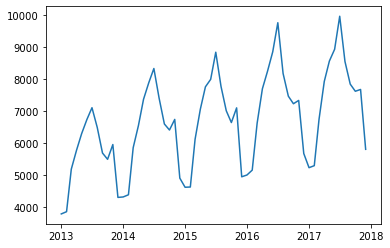

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df.index, df['price'])

-> Multiplicative(추세에 따른 계절성 존재)

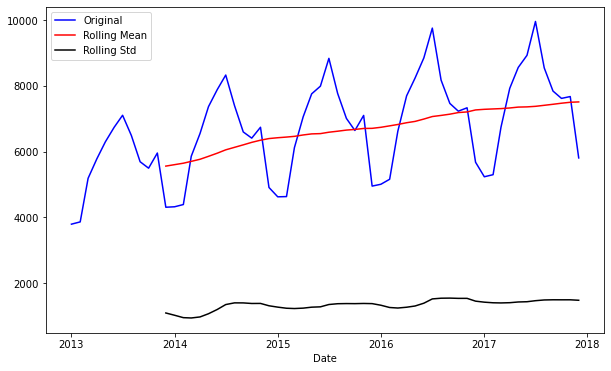

In [12]:
def plot_rolling(data, interval):
    
    rolmean=data.rolling(interval).mean()
    rolstd=data.rolling(interval).std()
    
    plt.figure(figsize=(10,6))
    plt.xlabel('Date')
    orig=plt.plot(data, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    std=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
plot_rolling(df, 12)

평균이 꾸준히 상승하고 있는 것을 확인

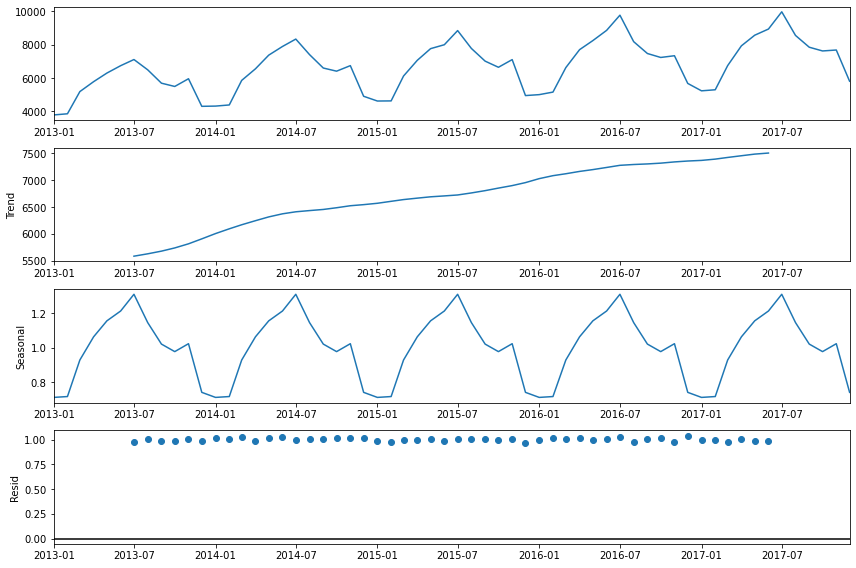

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts=df
result=seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize']=[12,8]
result.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

training=df[:'2016-12-01']
test=df.drop(training.index)

adf=adfuller(training, regression='ct')
print(adf[1])

0.6015863303794268


<AxesSubplot:xlabel='day'>

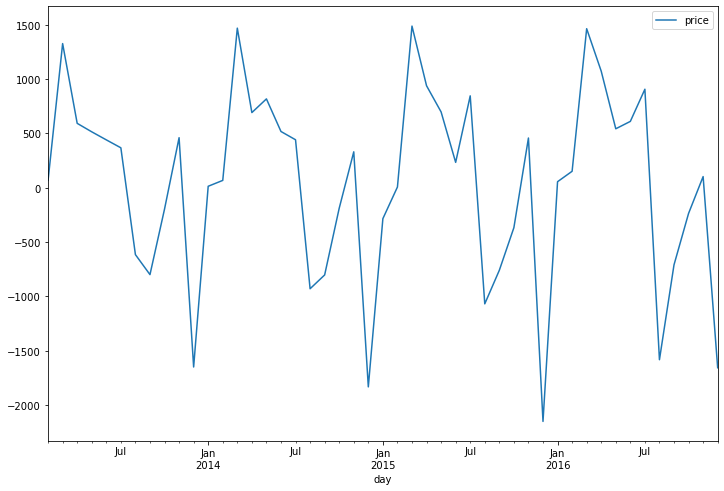

In [16]:
diff_data=training.diff(1)
diff_data=diff_data.dropna()
diff_data.plot()

In [17]:
adf=adfuller(diff_data)
print(adf[1])

2.0851606399610975e-22


귀무가설을 기각한다. 정상성이다.

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(training, order=(2,1,2), trend='ct')

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ValueError: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(training, order=(2,1,2),trend='ct')

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ValueError: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.